<a href="https://colab.research.google.com/github/juliasalto/proyectoml/blob/main/logistic_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook desarrollo la construcción de un modelo de regresión logística para el proyecto

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
from google.colab import auth
from google.cloud import bigquery

In [12]:
df = pd.read_csv("/content/rh_data - rh_data (2).csv")

In [13]:
df.head()

,Age,AgeCategory,Attrition,BusinessTravel,Department,DistanceFromHome,DistanceCategory,Education,EducationCategory,EducationField,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,CategoryYearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,D,No,Travel_Rarely,Sales,6,Mid-Short Distance,2,Graduated,Life Sciences,...,Y,11,8,0,1.0,6,1,A,0,0
1,31,B,Yes,Travel_Frequently,Research and Development,10,Mid-Long Distance,1,Undergraduated,Life Sciences,...,Y,23,8,1,6.0,3,5,B,1,4
2,32,B,No,Travel_Frequently,Research and Development,17,Long Distance,4,Mastery,Other,...,Y,15,8,3,5.0,2,5,B,0,3
3,38,C,No,Non-Travel,Research and Development,2,Short Distance,5,Doctorate,Life Sciences,...,Y,11,8,3,13.0,5,8,C,7,5
4,32,B,No,Travel_Rarely,Research and Development,10,Mid-Long Distance,1,Undergraduated,Medical,...,Y,12,8,2,9.0,2,6,C,0,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   AgeCategory              4410 non-null   object 
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   DistanceCategory         4410 non-null   object 
 7   Education                4410 non-null   int64  
 8   EducationCategory        4410 non-null   object 
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  EmployeeID               4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  LevelCategory           

In [15]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Imputación de nulos

In [16]:
mean_total_working_years = df['TotalWorkingYears'].mean()

df['TotalWorkingYears'].fillna(mean_total_working_years, inplace=True)
print(df['TotalWorkingYears'].isnull().sum())

0


In [17]:
mean_num_companies = df['NumCompaniesWorked'].mean()

df['NumCompaniesWorked'].fillna(mean_num_companies, inplace=True)
print(df['NumCompaniesWorked'].isnull().sum())

0


Conteo de variables categóricas

In [18]:
print(df.groupby('Attrition').size())

Attrition
No     3699
Yes     711
dtype: int64


In [19]:
variables = ['AgeCategory', 'DistanceCategory', 'IncomeCategory', 'BusinessTravel' ,'JobRole', 'EducationField', 'Department', 'MaritalStatus', 'LevelCategory', 'EducationCategory', 'CategoryYearsAtCompany']

df_attrition_yes = df[df['Attrition'] == 'Yes']

for variable in variables:
    print(f"Conteo para {variable} con Attrition = Yes:")
    print(df_attrition_yes[variable].value_counts())
    print("\n")

Conteo para AgeCategory con Attrition = Yes:
AgeCategory
A    300
B    198
D    126
C     87
Name: count, dtype: int64


Conteo para DistanceCategory con Attrition = Yes:
DistanceCategory
Short Distance        210
Long Distance         180
Mid-Short Distance    162
Mid-Long Distance     159
Name: count, dtype: int64


Conteo para IncomeCategory con Attrition = Yes:
IncomeCategory
Mid Income         207
Low Income         201
Mid-Low Income     156
Mid-High Income     99
High Income         48
Name: count, dtype: int64


Conteo para BusinessTravel con Attrition = Yes:
BusinessTravel
Travel_Rarely        468
Travel_Frequently    207
Non-Travel            36
Name: count, dtype: int64


Conteo para JobRole con Attrition = Yes:
JobRole
Sales Executive              165
Research Scientist           159
Laboratory Technician        126
Healthcare Representative     57
Research Director             57
Manufacturing Director        48
Manager                       42
Sales Representative        

Dsitribución de variables numéricas

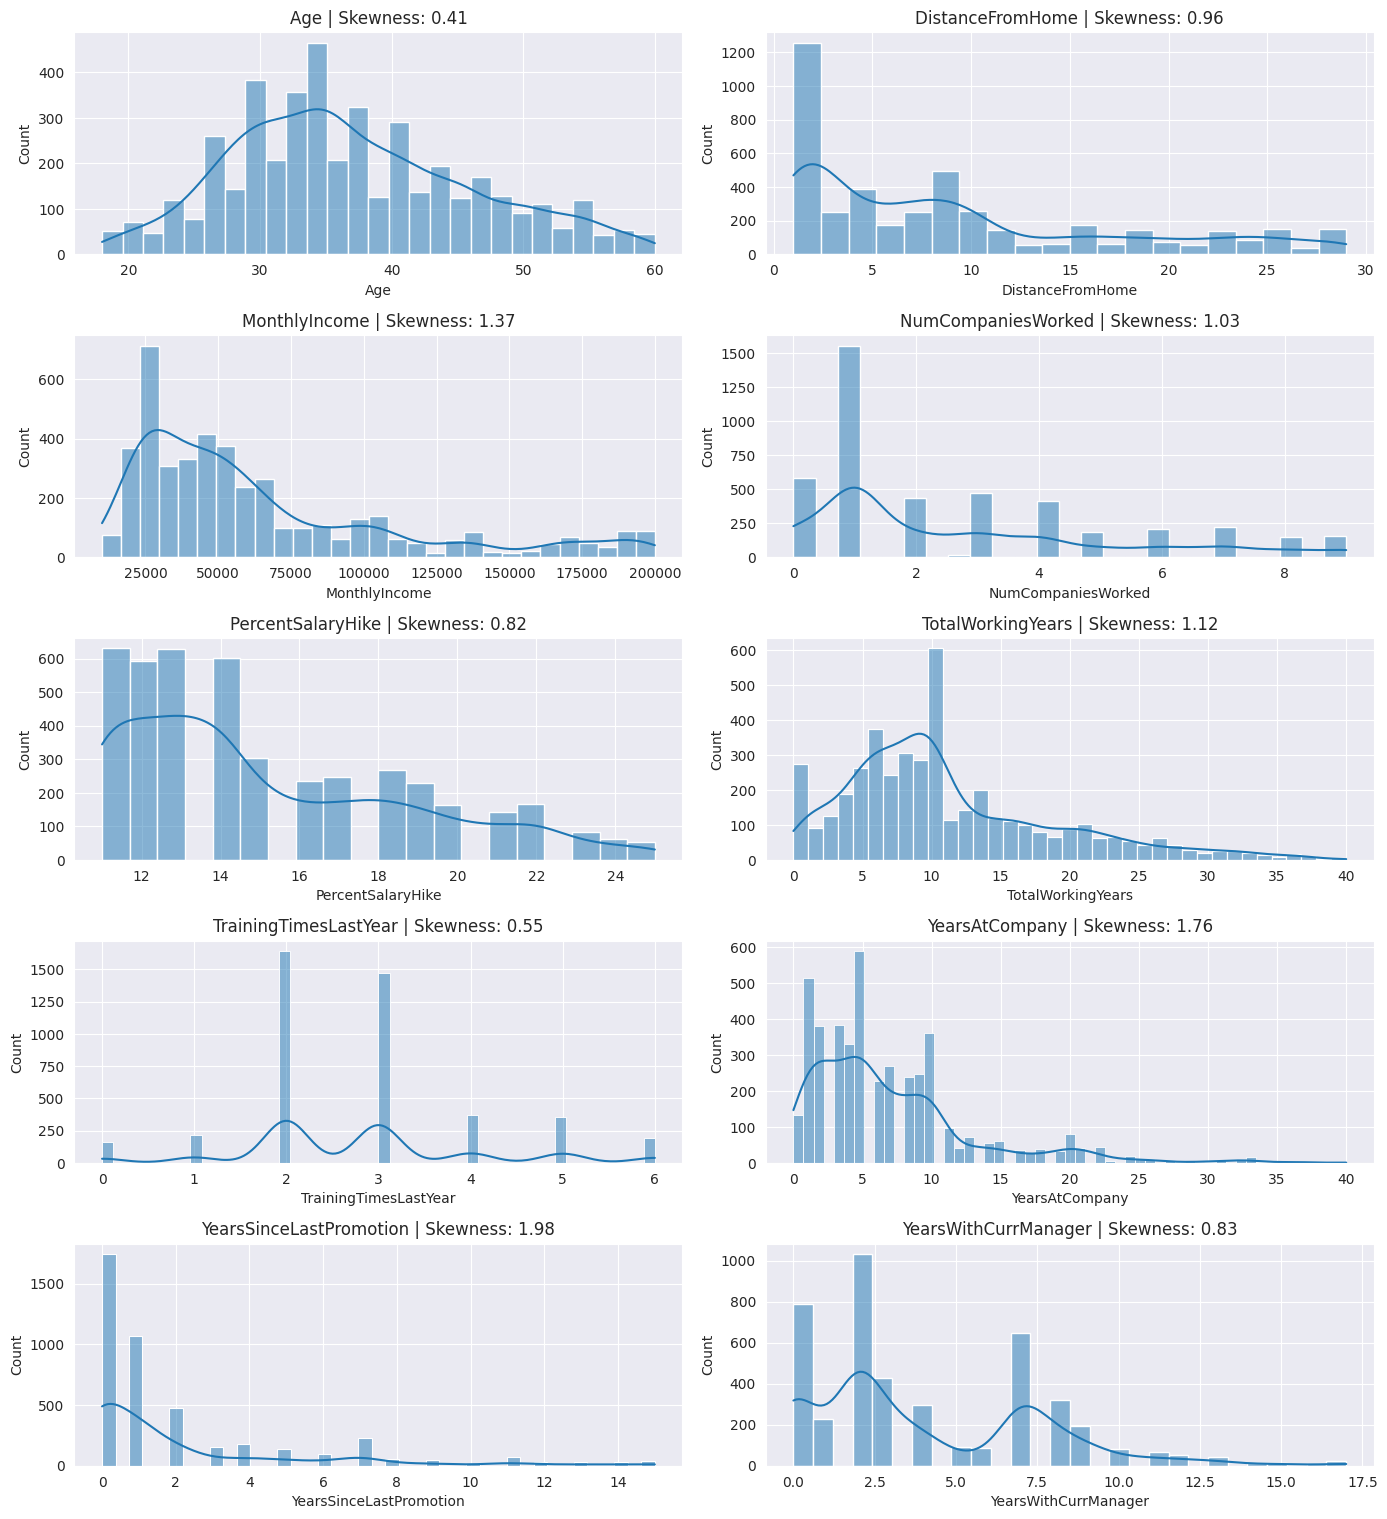

In [9]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns = numerical_columns.drop(['Education', 'JobLevel', 'EmployeeID', 'EmployeeCount', 'StandardHours', 'StockOptionLevel'], errors='ignore')

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Matriz de correlación de variables numéricas

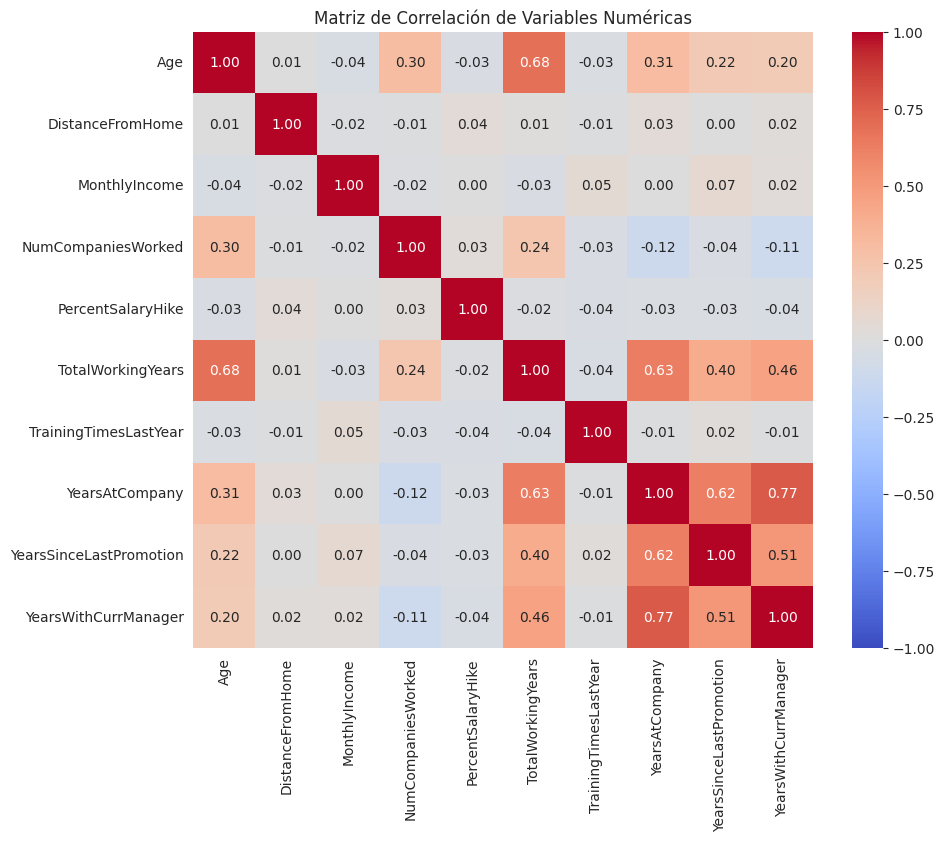

In [10]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['EmployeeID', 'EmployeeCount', 'StandardHours', 'Education', 'JobLevel', 'StockOptionLevel'], errors='ignore')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

*One-hot encoding* de variables categóricas

In [20]:
df = pd.get_dummies(df, columns=['AgeCategory', 'DistanceCategory', 'BusinessTravel', 'Department', 'EducationCategory', 'EducationField', 'LevelCategory', 'JobRole', 'MaritalStatus', 'IncomeCategory', 'CategoryYearsAtCompany'], drop_first=True)

df.head()


,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,IncomeCategory_Low Income,IncomeCategory_Mid Income,IncomeCategory_Mid-High Income,IncomeCategory_Mid-Low Income,CategoryYearsAtCompany_B,CategoryYearsAtCompany_C,CategoryYearsAtCompany_D
0,51,No,6,2,1,1,Female,1,131160,1.0,...,False,True,False,False,False,True,False,False,False,False
1,31,Yes,10,1,1,2,Female,1,41890,0.0,...,False,False,True,False,False,False,True,True,False,False
2,32,No,17,4,1,3,Male,4,193280,1.0,...,False,True,False,False,False,False,False,True,False,False
3,38,No,2,5,1,4,Male,3,83210,3.0,...,False,True,False,False,True,False,False,False,True,False
4,32,No,10,1,1,5,Male,1,23420,4.0,...,False,False,True,True,False,False,False,False,True,False


Definición de variables X e Y

In [21]:
X = df.drop(columns=['Attrition', 'EmployeeID', 'EmployeeCount','Gender', 'Over18', 'StandardHours', 'Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'])

# Definir la variable objetivo 'y' como la columna 'Attrition' (convertida en binaria)
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

División de datos en entrenamiento (70%) y prueba (30%)

In [22]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Balanceo de conjunto de entrenamiento

In [23]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del balanceo
print("Distribución de clases después del balanceo:")
print(y_train_balanced.value_counts())

Distribución de clases después del balanceo:
Attrition
0    2584
1    2584
Name: count, dtype: int64


Random Forest para ver importancia de variables

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Mostrar las características más importantes
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                                Feature  Importance
5                  YearsWithCurrManager    0.088994
0                    NumCompaniesWorked    0.064975
1                     PercentSalaryHike    0.064946
38                 MaritalStatus_Single    0.063897
3                 TrainingTimesLastYear    0.049426
4               YearsSinceLastPromotion    0.044065
2                      StockOptionLevel    0.030246
12     BusinessTravel_Travel_Frequently    0.029350
40            IncomeCategory_Mid Income    0.023044
28           LevelCategory_Intermediate    0.022627
25                  LevelCategory_Entry    0.022089
39            IncomeCategory_Low Income    0.020861
37                MaritalStatus_Married    0.020034
20         EducationField_Life Sciences    0.019938
6                         AgeCategory_B    0.019589
14  Department_Research and Development    0.019107
34           JobRole_Research Scientist    0.018634
18            EducationCategory_Mastery    0.018633
11      Dist

Entrenamiento de la regresión logística (30% de prueba)

In [26]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

# Entrenar el modelo
logistic_model.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=500)

Predicción del modelo y su rendimiento

In [27]:
from sklearn.metrics import classification_report, accuracy_score
#buscar coeficientes en notebook de mails o rr
# Realizar predicciones con el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7709750566893424
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1115
           1       0.31      0.38      0.34       208

    accuracy                           0.77      1323
   macro avg       0.60      0.61      0.60      1323
weighted avg       0.79      0.77      0.78      1323



Matriz de confusión

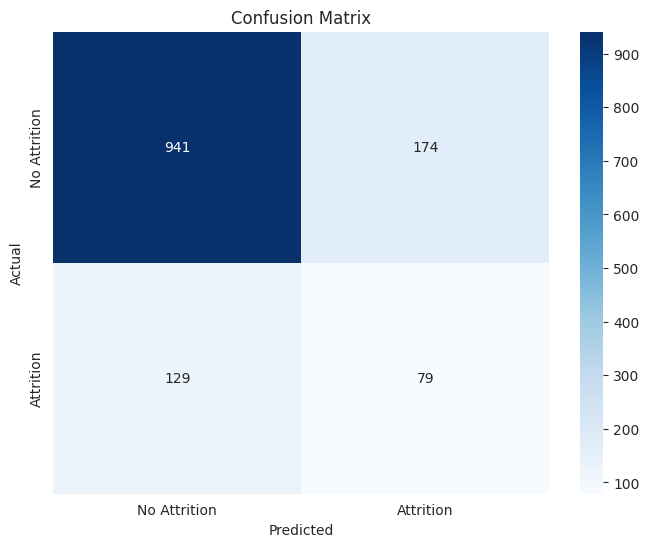

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones
y_pred = logistic_model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Validación cruzada (k=5)

In [31]:
from sklearn.model_selection import cross_val_score

# Validación cruzada (K=5)
cv_scores = cross_val_score(logistic_model, X_train_balanced, y_train_balanced, cv=5)

# Mostrar los resultados de la validación cruzada
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.61702128 0.83268859 0.82301741 0.81703775 0.84511133]
Mean CV Score: 0.7869752706151545
